# <span style="color:red"> Predict term deposit </span>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv("Assignment-2_Data.csv")
df.drop("Id", axis=1, inplace=True)
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [5]:
df.head()

,Id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1001,999.0,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,1002,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,1003,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,1004,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,1005,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198,1,-1,0,unknown,no


# Explore the data step

__Check for missing values__

In [26]:
df.isnull().sum().to_frame().T
# balance and age had missing values

,Id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,9,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0


In [27]:
# delete the rows of these missing values
# 1- shape of df
df.shape

(45211, 18)

In [3]:
# 2- delete missing values
df.dropna(subset=["balance"], inplace=True)
df.dropna(subset=["age"], inplace=True)

_Show the ratios of the target_

In [4]:
df["y"].value_counts() / len(df) * 100
# a ratio od no is 88% and ratio of yes is 12% nearly..the data set is unbalanced issue

no     88.298673
yes    11.701327
Name: y, dtype: float64

In [4]:
df.select_dtypes(exclude = np.number).head(2) # categorical columns

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no


In [38]:
df.select_dtypes(np.number).head(2) # numerical columns

,Id,age,balance,day,duration,campaign,pdays,previous
0,1001,999.0,2143.0,5,261,1,-1,0
1,1002,44.0,29.0,5,151,1,-1,0


# Data Visualization

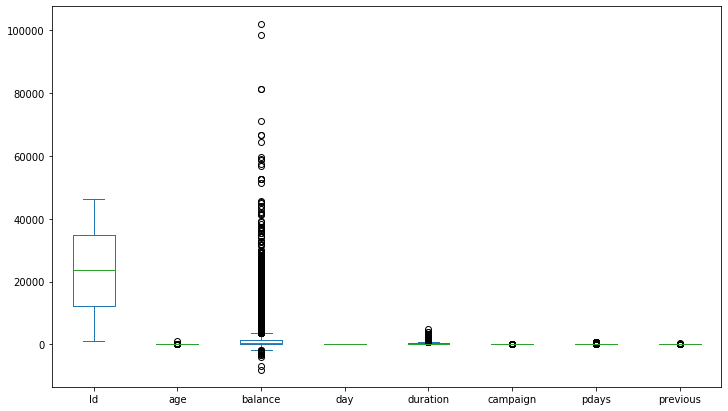

In [6]:
df.select_dtypes(np.number).plot(kind="box", figsize=(12, 7))

__Age attribute__

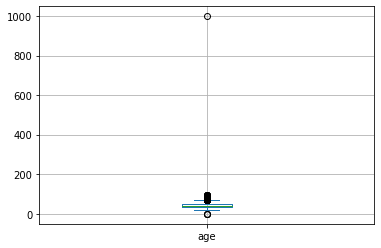

In [52]:
df["age"].plot(kind="box")
plt.grid(True)

In [8]:
df[df["age"] == df["age"].max()] # there`s no age of 999 defenetly its an outlier

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
41663,95.0,retired,married,secondary,no,0.0,no,no,telephone,1,oct,215,1,-1,0,unknown,no


In [5]:
# df.plot(kind="line", figsize=(12, 7)) 

In [4]:
index = df[df["age"] == df["age"].max()].index[0]
df.drop(index= index, inplace = True)

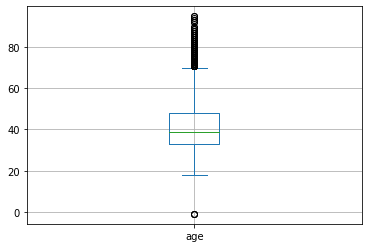

In [64]:
# plot the boxplot again
df["age"].plot(kind="box")
plt.grid(True) # -> better than before

__duration attribute__

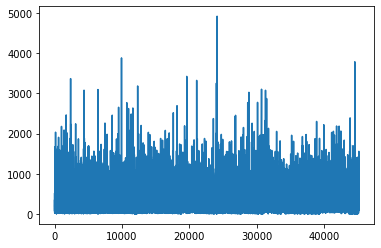

In [6]:
df["duration"].plot(kind="line")

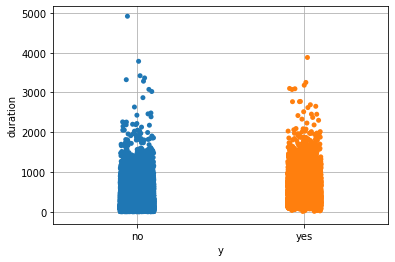

In [70]:
sns.stripplot(y = df["duration"], x = df["y"])
plt.grid(True)

__BOX PLOT FOR ALL NUMERICAL ATTRIBURES__

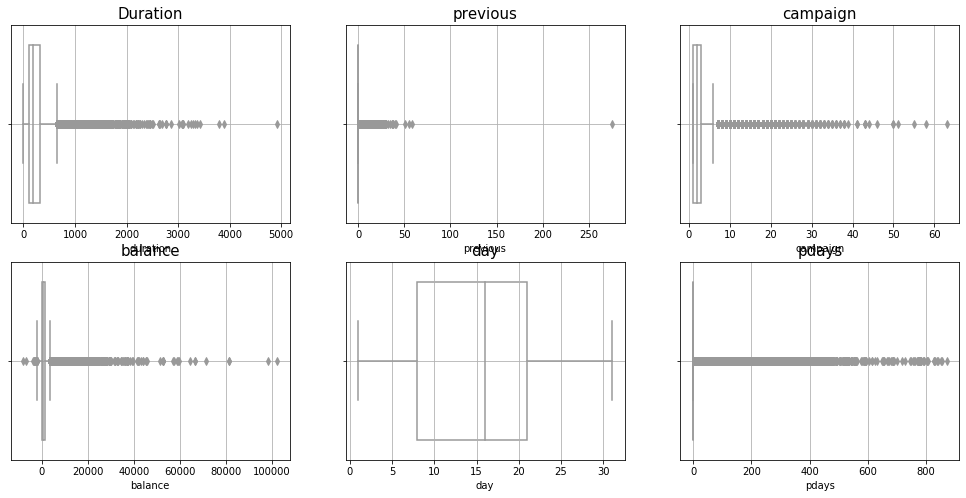

In [5]:
fig, ax = plt.subplots(2, 3 , figsize=(17, 8))

plt.sca(ax[0][0])
sns.boxplot(df["duration"], color="white", hue=df["y"])
plt.title("Duration", fontsize=15)
plt.grid(True)

plt.sca(ax[0][1])
# an outlier occurs
sns.boxplot(df["previous"], color="white", hue=df["y"])
plt.title("previous", fontsize=15)
plt.grid(True)

plt.sca(ax[0][2])
sns.boxplot(df["campaign"], color="white", hue=df["y"])
plt.title("campaign", fontsize=15)
plt.grid(True) 


plt.sca(ax[1][0])
sns.boxplot(df["balance"], color="white", hue=df["y"])
plt.title("balance", fontsize=15)
plt.grid(True) 


plt.sca(ax[1][1])
sns.boxplot(df["day"], color="white", hue=df["y"])
plt.title("day", fontsize=15)
plt.grid(True) 


plt.sca(ax[1][2])
sns.boxplot(df["pdays"], color="white", hue=df["y"])
plt.title("pdays", fontsize=15)
plt.grid(True) 

In [6]:
idnex = df[df["previous"] == df["previous"].max()].index[0]
df[df["previous"] == df["previous"].max()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
29182,40.0,management,married,tertiary,no,543.0,yes,no,cellular,2,feb,349,2,262,275,other,no


In [7]:
df.drop(index = idnex, inplace=True)

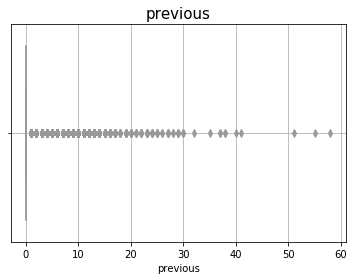

In [166]:
sns.boxplot(df["previous"], color="white", hue=df["y"])
plt.title("previous", fontsize=15)
plt.grid(True)
plt.show()

In [167]:
df.isnull().sum() # the data frame is clear

Id           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

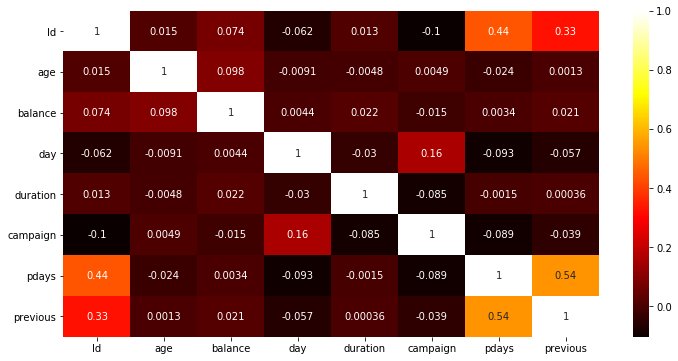

In [180]:
plt.figure(figsize=(12, 6))
sns.heatmap( df.corr() , annot=True, cmap=plt.cm.hot)
plt.show()

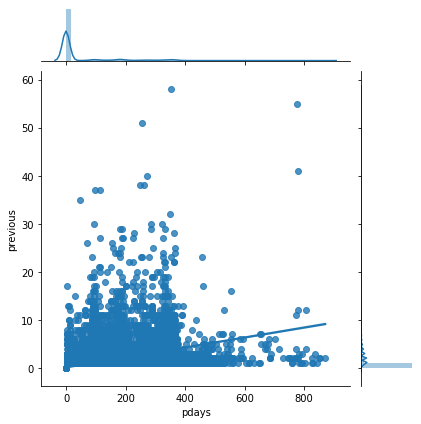

In [182]:
sns.jointplot(df["pdays"], df["previous"], kind="reg")

# Data analysis without asking questions (by exploration)

In [10]:
df.head(2)

,Id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,1002,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,1003,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76,1,-1,0,unknown,no


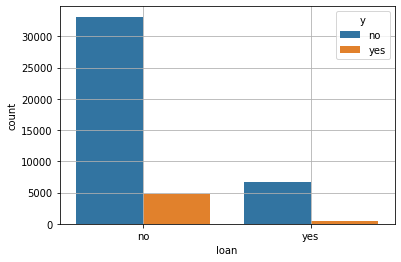

In [16]:
sns.countplot(df["loan"], hue = df["y"])
plt.grid(True)
plt.show()

-	Some clients whose subscribed deposit bank products had lower personal loan, and there`re some clients had personal loan and subscribed deposit product and its higher than those not had personal loan.
-	The data shown higher no personal loan and higher no subscriptions, and some had no personal loan but subscribed to bank`s products.
-	


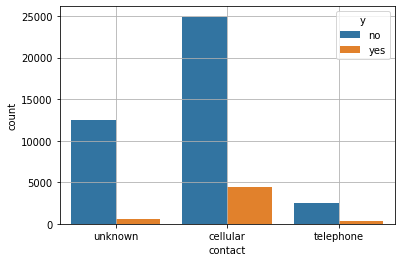

In [17]:
sns.countplot(df["contact"], hue = df["y"])
plt.grid(True)
plt.show()
# When contacting the clients with cellular they make a subscribtion than when unkown contact or telephone.

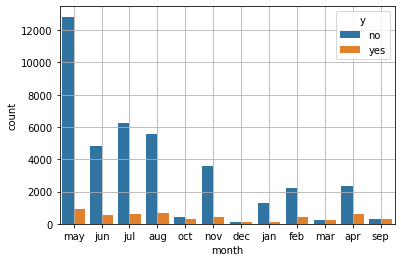

In [20]:
sns.countplot(df["month"], hue = df["y"])
plt.grid(True)
plt.show()
# best month when the clients make subscription is may, aug, apr, july and jun
# in may there`s huge clients had no subscribtion why this happened?
# the months like: July, Aug, Jun, Nov, Apr, Feb had respectively higher unsubscriptions to bank`s products.

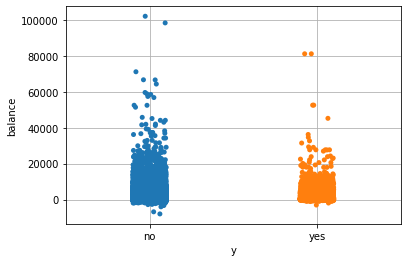

In [24]:
sns.stripplot(df["y"], df["balance"])
plt.grid(True)
plt.show()
# the first question you maight ask is there an outlier, when the client had no subscribtion?

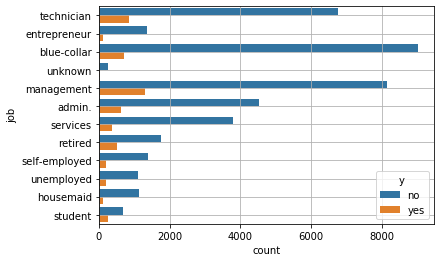

In [26]:
# who makes that subscribtion
sns.countplot(y = df["job"], hue = df["y"])
plt.grid(True)
plt.show()
# a manager, technician, blue-collar, admin, retired respectively had subscribtion to loan prodcut
# we can see here some notes:
        # 1- student subscribed bank`s products
        # 2- housemaid had less subscribtion than student, What that mean then?
        # 3- enterpreneur the lowest clients subscribed in bank.

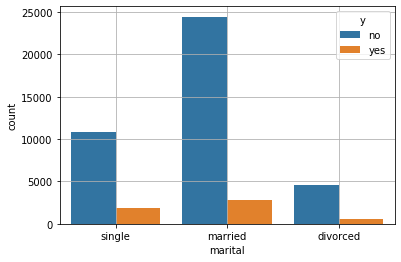

In [32]:
# is he married, widowed (divorced) or not.
sns.countplot(df["marital"], hue=df["y"])
plt.grid(True)
plt.show()
# a lot subscribed when they married and single than divorced once
# but a lot had no subscribtion to the loan when they married, single, divorced respectively.
# beacuse the data is unbalanced lots of data shown here huge number of clients unsubscribed to bank`s products.
# we want to see if there`s a signal to what`s going on.

In [86]:
df.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76,1,-1,0,unknown,no


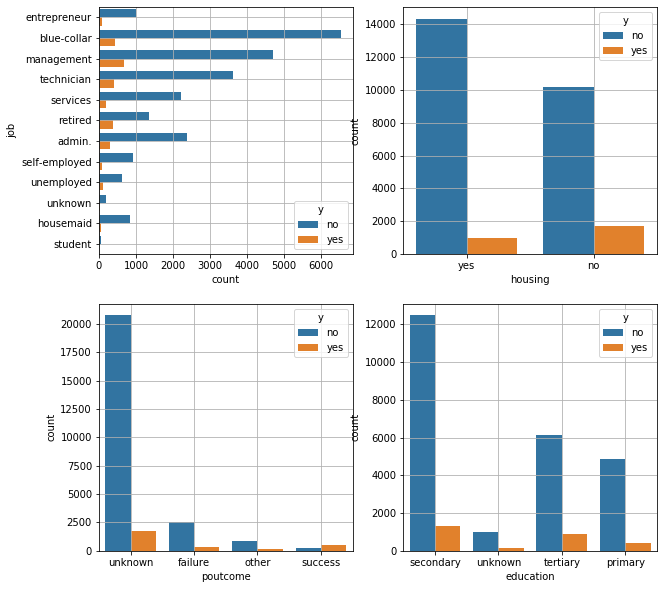

In [89]:
# slice to marital married
marital = df[df["marital"] == "married"].copy()

fig ,ax = plt.subplots(2, 2, figsize=(10, 10))
plt.sca(ax[0][0])
sns.countplot(y = married["job"], hue = married["y"])
plt.grid(True)
plt.sca(ax[0][1])
sns.countplot( married["housing"], hue = married["y"])
plt.grid(True)
plt.sca(ax[1][0])
sns.countplot( married["poutcome"], hue = married["y"])
plt.grid(True)
plt.sca(ax[1][1])
sns.countplot(married["education"], hue = married["y"])
plt.grid(True)
plt.show()

- poutcome: previous outcome of the previous campagin.
- housing: if had housing loan.

__Previous column issuing an outlier (explore and delete it)__

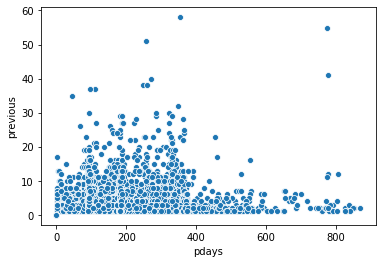

In [8]:
sns.scatterplot(df["pdays"], df["previous"])
# i think there`s an outlier here lets`s got it.

In [95]:
df["previous"].unique()

array([  0,   3,   1,   4,   2,  11,  16,   6,   5,  10,  12,   7,  18,
         9,  21,   8,  14,  15,  26,  37,  13,  25,  20,  27,  17,  23,
        38,  29,  24,  51, 275,  22,  19,  30,  58,  28,  32,  40,  55,
        35,  41], dtype=int64)

In [9]:
df[df["previous"] == df["previous"].max()] # yeah this is a huge number than others
# previous means is the number of contact performed before campagin
# lets explore it and make delete decision.
huge_previous = df[df["previous"] == df["previous"].max()].copy()
huge_previous # total duration 4hrs and 8.7 month of contacting before compagin!
# had huge balance and tertiary the 3rd level of education and married he is a manager and 40 years, had no subscribtion.
# so why he had huge previous, duration, and previous and makes no subscribtion to bank term of deposit!?.

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
38326,46.0,blue-collar,married,primary,no,1085.0,yes,yes,cellular,15,may,523,2,353,58,other,yes


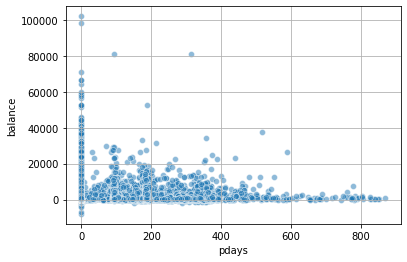

In [120]:
sns.scatterplot(df["pdays"], df["balance"], alpha=0.5)
plt.grid(True)
plt.show()

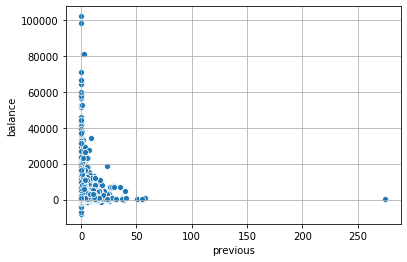

In [123]:
sns.scatterplot(df["previous"], df["balance"])
plt.grid(True)
plt.show() # an outlier shown here!
#but the client that had more than 100,000 balance -> the average yearly balance had no more previous contact more than 1hr
# this is may an outlier of client contacted > 250, since the balance is lower or similar to other clients

In [10]:
huge_previous

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
38326,46.0,blue-collar,married,primary,no,1085.0,yes,yes,cellular,15,may,523,2,353,58,other,yes


In [10]:
df[df["balance"] >=10_000].head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
34,51.0,management,married,tertiary,no,10635.0,yes,no,unknown,5,may,336,1,-1,0,unknown,no
69,35.0,blue-collar,single,secondary,no,12223.0,yes,yes,unknown,5,may,177,1,-1,0,unknown,no


In [ ]:
# when comparing the 3 records..
# the outlier (i.e. the once tha had huge previous contact) is similar to the two normal records.
# married, management, tertiary, no default, more balance >100,000 yes for housing loan, duration < 349
# -1 means clients was no previously contacted

In [11]:
# delete that record the outlier of previous contact
df.drop(index = huge_previous.index[0], axis=1, inplace=True)

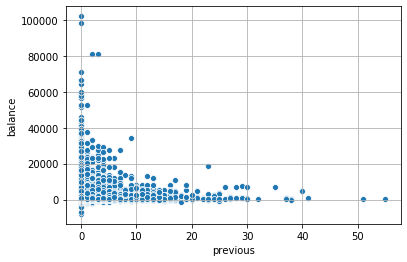

In [11]:
sns.scatterplot(df["previous"], df["balance"])
plt.grid(True) # the graph is nearly better than before

__Other features__

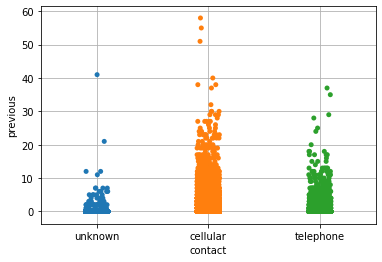

In [138]:
sns.stripplot(df["contact"], df["previous"])
plt.grid(True)
plt.show() # may shown an outlier!

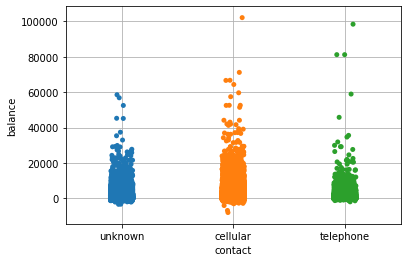

In [139]:
sns.stripplot(df["contact"], df["balance"])
plt.grid(True)
plt.show()

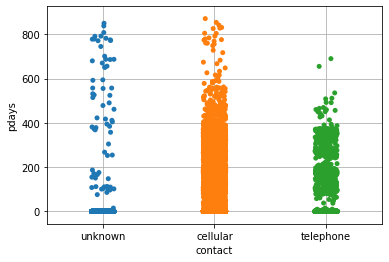

In [140]:
sns.stripplot(df["contact"], df["pdays"])
plt.grid(True) # perfect graph and the number of celluar had sucessfully perfect way of contact then telephone.
plt.show()

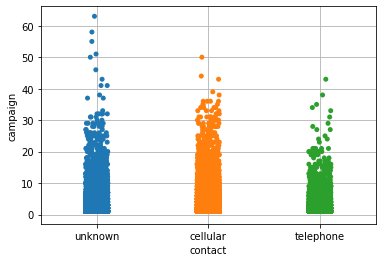

In [143]:
sns.stripplot(df["contact"], df["campaign"])
plt.grid(True)
plt.show() # the compagin happend to be with unkown ways of contaction.

In [152]:
df[df["campaign"] >= 50]
# 1- were no precviously contacted
# 2- happend in may, july and jun
# 3- married and single, primary, secondary tertiary and unknown
# 4- contacted by celluar and others.
# 5- clients of age range 24-45 years.
# 6- yes for housung loan and no for personal loan only the blue-collar had personal loan.
# 7- no subscribtion unfortunately.

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4299,30.0,management,single,tertiary,no,358.0,yes,no,unknown,19,may,88,51,-1,0,unknown,no
4330,45.0,management,married,unknown,no,9051.0,yes,no,unknown,19,may,124,63,-1,0,unknown,no
5073,35.0,technician,married,secondary,no,432.0,yes,no,unknown,21,may,1094,55,-1,0,unknown,no
5459,35.0,blue-collar,married,secondary,no,430.0,yes,no,unknown,23,may,147,50,-1,0,unknown,no
11914,24.0,technician,single,primary,no,126.0,yes,no,unknown,20,jun,10,58,-1,0,unknown,no
18713,35.0,blue-collar,married,secondary,no,280.0,yes,yes,cellular,31,jul,65,50,-1,0,unknown,no


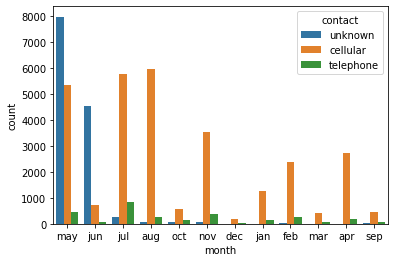

In [150]:
sns.countplot(df["month"], hue=df["contact"])
plt.show()
# as we can see here celluar is the best way to contact esp. in Aug, July and May.

__Age feature and removing the outliers__

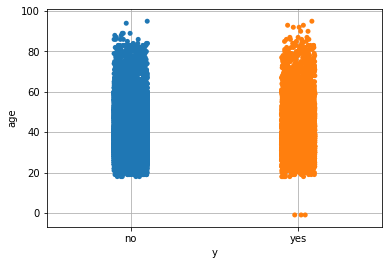

In [156]:
sns.stripplot(df["y"], df["age"])
plt.grid(True) # outlier!
plt.show()

In [11]:
df[df["age"] < 10] # yes we detect another outlier the customer age never be -1b

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45203,-1.0,student,single,tertiary,no,113.0,no,no,cellular,17,nov,266,1,-1,0,unknown,yes
45204,-1.0,retired,married,secondary,no,2850.0,no,no,cellular,17,nov,300,1,40,8,failure,yes
45205,-1.0,technician,single,secondary,no,505.0,no,yes,cellular,17,nov,386,2,-1,0,unknown,yes


In [10]:
df["age"].unique() # as we see the age of client never be -1

array([44., 33., 47., 35., 28., 41., 29., 53., 58., 57., 51., 45., 60.,
       56., 32., 25., 40., 39., 52., 46., 36., 49., 59., 37., 50., 54.,
       55., 48., 31., 43., 42., 30., 27., 34., 38., 23., 26., 61., 22.,
       24., 21., 20., 66., 62., 83., 75., 67., 70., 65., 68., 64., 69.,
       72., 71., 19., 76., 85., 63., 90., 82., 73., 74., 78., 80., 94.,
       79., 77., 86., 95., 81., 18., 89., 84., 87., 92., 93., 88., -1.])

In [12]:
print(f"The shape of DataFrame before removing bad_age {df.shape}")
bad_age = df[df["age"] == -1]["age"].index
df.drop(index = bad_age, axis=1, inplace=True)
print(f"The shape of DataFrame after removing the bad_age outliers {df.shape}")

The shape of DataFrame before removing bad_age (45197, 17)
The shape of DataFrame after removing the bad_age outliers (45194, 17)


## Sampling the data and detect the best algorithm coording to the graph

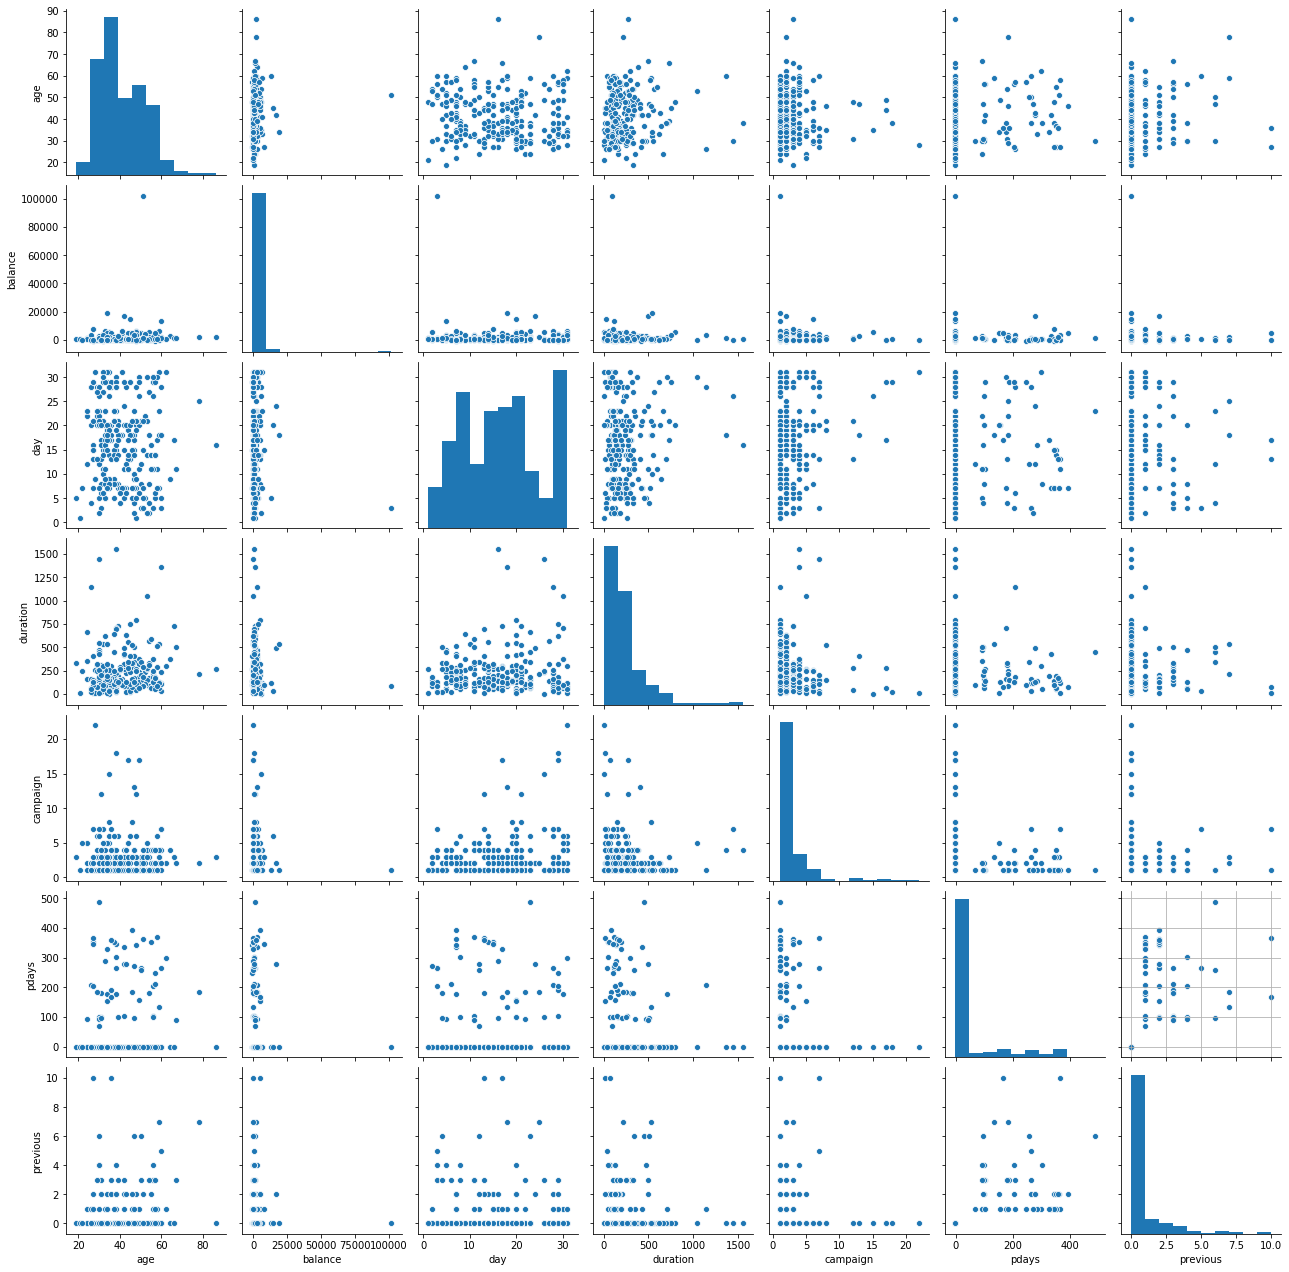

In [178]:
DataSample = df.sample(n=250)
sns.pairplot(DataSample)
plt.grid(True)
plt.show()

In [ ]:
# Decision Making?
# seems to be DecisionTreeClassifier is best for or RandomForestCassifier!
# Its possible to use KNeighborsClassifier.
# lets see before fed to algorithm immediately (i.e. a)

# Preprocessing step

# Machine Learining Step

__Convert the target__

In [13]:
# converted target
df["y"] =  df["y"].apply(lambda x: 0 if x == "no" else 1)

# make pipeline

In [14]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
# _______________________________________________
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin

class ColumnNames(BaseEstimator, TransformerMixin):
    """To select custome fratures and its essential for FeatureUnion unless
    its not a dataframe"""
    def __init__(self, columns):
        self.columns = columns
    def fit(self, X, y = None):
        return self
    def transform(self, X):
        return X[self.columns].values

cat_columns = df.select_dtypes(exclude = np.number).columns.to_list()
cat_columns.append("pdays")
num_columns = list( df.select_dtypes(np.number).drop("pdays", axis=1) )

__Develop Two pipelines and its FeatureUnion__

In [17]:
# develop numerical pipeline
numerical_pipeline = Pipeline([("ColumnNames", ColumnNames(num_columns)),
                               ("Scaler",StandardScaler())])
# develop categorical pipeline
categorical_pipeline = Pipeline([("ColumnNames", ColumnNames(cat_columns)),
                                 ("OHE", OneHotEncoder(sparse=False)) ])
# put all together the two pipelines
# full_pipeline = FeatureUnion(transformer_list = [("NumericalPipeline",numerical_pipeline ),
#               ("CategoricalPipeline", categorical_pipeline)])

# transformed_dataset = full_pipeline.fit_transform(df)
# print("transformed_dataset:", transformed_dataset.shape)

In [18]:
cat_pipe = np.c_[ categorical_pipeline.fit_transform(df), df.select_dtypes(np.number) ]

__Using ColumnTransformer instead__

In [19]:
from sklearn.compose import ColumnTransformer

num =  Pipeline([("Scaler",StandardScaler())])
cat = Pipeline([("OHE", OneHotEncoder(sparse=False)) ])

columns_transformer = ColumnTransformer([("num",num ,num_columns ), ("cat",cat ,cat_columns )])

transformed_df = columns_transformer.fit_transform(df)

__Balance target__

In [20]:
from imblearn.over_sampling import SMOTE

somte = SMOTE(random_state=42, k_neighbors=10)
final_dataset = somte.fit_resample(cat_pipe, df["y"])

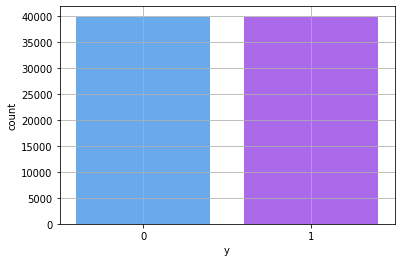

In [44]:
sns.countplot(final_dataset[1], palette="cool")
plt.grid(True)
plt.show()

In [21]:
print("Traning data: ",final_dataset[0].shape)
print("Target data: ",final_dataset[1].shape)

Traning data:  (79818, 611)
Target data:  (79818,)


In [19]:
final_dataset[1].value_counts() / len(final_dataset[1]) * 100
# now the dataset is balanced 505 yes and 50% no

0    50.0
1    50.0
Name: y, dtype: float64

# __split the dataset into training and testing__

In [22]:
from sklearn.model_selection import train_test_split

X = final_dataset[0]
y = final_dataset[1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)

In [21]:
print(f"X-train shape {X_train.shape}")
print(f"X-test shape {X_test.shape}")
print(f"y_test {y_test.shape}")

X-train shape (59863, 611)
X-test shape (19955, 611)
y_test (19955,)


__Apply machine learning algorithm__

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier

__APPLY using SVC__

In [130]:
model = SVC(random_state=42, )
dt = model.fit(X_train, y_train)

print( "ON Training", dt.score(X_train, y_train) )
print( "ON Testing", dt.score(X_test, y_test) )# the model seems to be overfitted the dataset!

0.745101314668493
0.7440741668754698


__USING LinearSVC__

_note: LinearSVC is faster thatn SVC_

__Apply KNeighborsClassifier__

In [44]:
model = KNeighborsClassifier( n_neighbors = 2)
knn = model.fit(X_train, y_train)

print( "ON-Training", knn.score(X_train, y_train) )
print( "ON-Testing", knn.score(X_test, y_test) ) # the model seems to be overfitted the dataset!

ON Training 0.9607102884920569
ON Testing 0.8568278626910548


__GridSearchCV {LogisticRegression, SVC, LinearSVC}__

In [ ]:
from sklearn.model_selection import GridSearchCV

# for LogisticRegression
params_grid = [{"random_state": [0, 42, 72], "max_iter": [300, 325, 350], "tol": [0.0002, 0.0003, 0.0004]}]
# SVC
params_grid_SGD = [{"tol":[0.02, 0.002], "max_iter":[150, 250, 500, 1000], "epsilon":[0.01, 0.07, 0.06, 0.05],
                   "random_state":[0, 42, 72]}]
# LinearSVC algorithm
params_LinearSVC = {"max_iter":[60, 80, 100], "random_state":[72, 128, 130]}
# for SVC
params_SVC = {"kernel": ['sigmoid', 'precomputed'],"random_state": [0, 42] } 

search = GridSearchCV(SVC( ), params_SVC, cv=3, n_jobs=-1,return_train_score=True )
search.fit(X_train, y_train)

In [ ]:
search.best_estimator_

In [ ]:
search.score

## METRICS

In [44]:
from sklearn.model_selection import cross_val_score
# scoring accuracy beacuse its a classification task
cross_val_score(model, X_train, y_train, cv=3, scoring="accuracy")

array([0.83828614, 0.83857873, 0.83607297])

In [26]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score

predict = cross_val_predict(KNeighborsClassifier(n_neighbors = 2), X_train, y_train, n_jobs=-1, verbose=3, cv=3)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  3.2min finished


In [27]:
confusion_matrix(y_train, predict )

array([[25838,  4093],
       [ 5565, 24367]], dtype=int64)

In [28]:
precision_score(y_train, predict )

0.8561841180604357

In [29]:
recall_score(y_train, predict )

0.8140785781103835

In [32]:
from sklearn.metrics import precision_recall_curve

predic_scores = cross_val_predict(KNeighborsClassifier(n_neighbors = 2), X_train, y_train, n_jobs=-1, verbose=3, cv=3, method="predict_proba")

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  3.0min finished


In [42]:
precisions, recalls, thresholds = precision_recall_curve(y_train, predic_scores[:, 1])

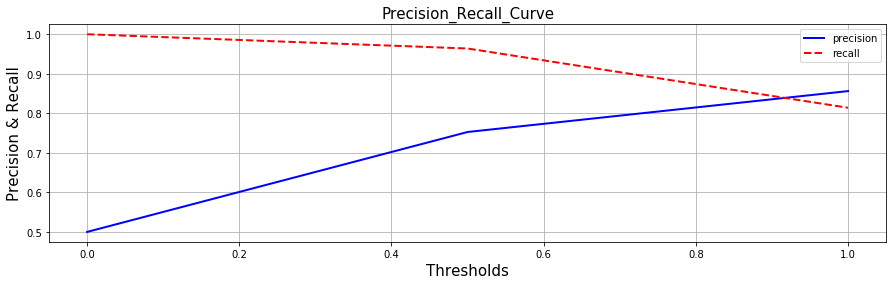

In [43]:
def PrecisionRecallCurve(precisions, recalls, thresholds, legend=True):
    plt.figure(figsize=(15, 4))
    plt.plot(thresholds, precisions[:-1], "b-", linewidth=2, label="precision")
    plt.plot(thresholds, recalls[:-1], "r--", linewidth=2, label="recall")
    plt.xlabel("Thresholds", fontsize=15)
    plt.ylabel("Precision & Recall", fontsize=15)
    plt.title("Precision_Recall_Curve", fontsize=15)
    plt.grid(True)
    if legend:
        plt.legend()
    
PrecisionRecallCurve(precisions, recalls, thresholds, True)

In [58]:
thresholds[ np.argmax(precisions == recalls ) ] 

0.0

In [66]:
a = set(thresholds)
b = set(recalls)

a.intersection(b)

{0.0, 1.0}

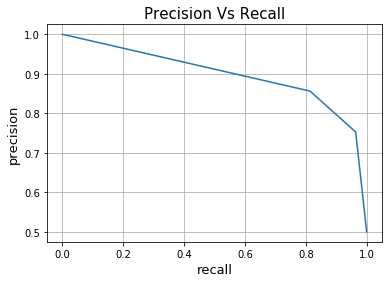

In [53]:
reall_90_precisions = recalls[np.argmax(precisions >= 0.90)]

plt.plot(recalls, precisions)
plt.title("Precision Vs Recall", fontsize=15)
plt.ylabel("precision", fontsize=13)
plt.xlabel("recall", fontsize=13)
plt.grid(True)
plt.show()

# save the best model

In [46]:
from joblib import dump

dump(cat_pipe, "Pipeline.5h")
dump(knn, "KNeighborsClassieri.h5")

['KNeighborsClassieri.h5']

_important note: the DecisionTreeClassifier works very will it gives 100% accuracy on both traning and testing and by using
maetrics like confusio_matrics make no error and precision-recall scores gives 100% !_